In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

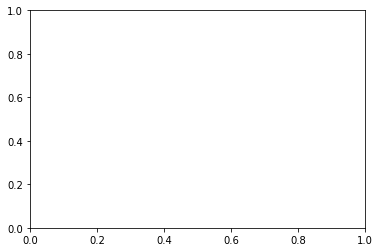

In [55]:
def plot_xi(data, ax = plt.gca(),**kwargs):
    x = data[:,0]
    y = data[:,0]**2*data[:,1]
    ax.plot(x, y, **kwargs)
    ax.set_xlabel(r'$s$ [$h^{-1}$Mpc]', fontsize=12)
    ax.set_ylabel(r'$\xi_0(s)$', fontsize=12)
    return x, y
def plot_delta_xi(data, ax = plt.gca(),**kwargs):
    x = data[:,0]
    y = data[:,0]**2*data[:,1]
    delta_y = data[:,0]**2*data[:,2]
    ax.fill_between(x, y-delta_y, y+delta_y, **kwargs)

# SNR

In [44]:
snr_avg_2pcf_data = np.loadtxt(
    '../../results/nosyst_v7/tpcf_void_mock_R-15.5-50_avg/TwoPCF_mockavg_nosyst_v7_void_R-15.5-50_cbz.ascii'
)
s_bao = 102.5
s_1_dl = 82.5
s_2_dl = 87.5
s_1_dr = 117.5
s_2_dr = 122.5
s_values = [s_bao, s_1_dl, s_2_dl, s_1_dr, s_2_dr]

[20 16 17 23 24]


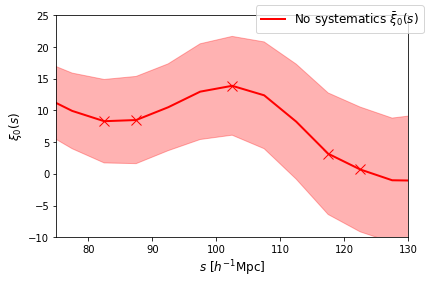

In [85]:
fig, ax = plt.subplots(1, 1)
snr_x, snr_y = plot_xi(snr_avg_2pcf_data,
                       ax=ax,
                       label=r'No systematics $\bar{\xi}_0(s)$',
                       c='r', lw=2)
plot_delta_xi(snr_avg_2pcf_data, ax=ax, alpha=0.3, color='r')
ax.set_xlim(75, 130)
ax.set_ylim(-10, 25)
s_ids = np.array([np.argwhere(snr_x == s) for s in s_values]).reshape(-1)
print(s_ids)
ax.vlines(s_ids,
          ymin=np.zeros_like(s_ids),
          ymax=snr_y[s_ids]/35,
          ls=':',
          color='k')
[
    ax.plot(snr_x[list(s_ids)],
            snr_y[list(s_ids)],
            marker='x',
            markersize=10,
            lw=0,
            color='r')
]
fig.legend(fontsize=12)
fig.tight_layout()
fig.savefig('snr_points.png', dpi=100)

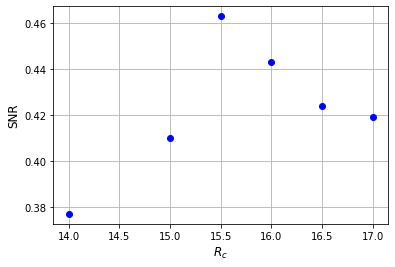

In [80]:
r_bin_min = [14, 15, 15.5, 16, 16.5, 17]
snr_values = [0.377, 0.410, 0.463, 0.443, 0.424, 0.419]
plt.plot(r_bin_min, snr_values, 'ob')
plt.ylabel('SNR', fontsize=12)
plt.xlabel('$R_c$', fontsize=12)
plt.grid()
plt.gcf()
plt.savefig('snr.png', dpi=100)